In [127]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
# Load the dataset
data = pd.read_csv('Cinderella_II_Dataset.csv')
data.head()

,engine_fuel_rate,accum_fuel_leg,engine_rpm,accelPedalPos,latitude,longitude,speedOverGround,courseOverGroundTrue,speedApparent,heading_magnetic,...,distanceToPreviousDock,delta_distance,accumDistLeg,Timestamp,accum_time_leg,sailing_state,closest_dock,segment_state,leg,RT_id
0,82.000000,0.013583,1326.416667,0.106413,59.401617,18.355397,0.448467,171.7957,4.662587,167.3953,...,17.744368,0.192010,0.375416,2022-07-01 08:54:52,0.60,un_specified,vaxholm,docking,vaxholm-sodra,0.0
1,101.333333,0.036750,1340.500000,0.131053,59.401609,18.355403,0.589003,171.7957,4.363132,167.3953,...,18.369153,0.228877,1.025822,2022-07-01 08:54:53,1.50,un_specified,vaxholm,docking,vaxholm-sodra,0.0
2,114.500000,0.069500,1379.500000,0.146299,59.401597,18.355410,0.742814,171.7957,4.006906,167.3953,...,19.411825,0.274332,1.930372,2022-07-01 08:54:54,2.55,un_specified,vaxholm,docking,vaxholm-sodra,0.0
3,120.000000,0.103833,1423.166667,0.152447,59.401582,18.355416,0.900456,171.7957,4.046811,167.3953,...,20.731121,0.331778,3.011387,2022-07-01 08:54:55,3.60,un_specified,vaxholm,docking,vaxholm-sodra,0.0
4,122.000000,0.134333,1423.083333,0.158249,59.401569,18.355422,1.056645,171.7957,4.165147,167.3953,...,21.983082,0.388637,4.119830,2022-07-01 08:54:56,4.50,un_specified,vaxholm,docking,vaxholm-sodra,0.0


In [128]:
# Convert the 'Timestamp' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set the 'Timestamp' column as the index
data.set_index('Timestamp', inplace=True)

In [129]:
data['relativeWind'] = abs(data['heading_magnetic'] - data['windDirection_Onb'])
# Resample and aggregate the relevant columns on 1 minute
minute_data = data[['engine_fuel_rate', 'relativeWind', 'windSpeed_Onb', 'speedOverGround']].resample('1T').mean().fillna(method='ffill')
minute_data.head()

,engine_fuel_rate,relativeWind,windSpeed_Onb,speedOverGround
Timestamp,,,,
2022-07-01 08:54:00,114.187500,16.131356,5.108177,1.003508
2022-07-01 08:55:00,50.954167,40.234593,4.740528,1.442286
2022-07-01 08:56:00,26.983333,81.124615,4.926118,3.378509
2022-07-01 08:57:00,64.006944,41.614692,7.990278,4.856032
2022-07-01 08:58:00,96.461111,54.745063,11.916174,6.805091


In [130]:
minute_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184709 entries, 2022-07-01 08:54:00 to 2022-11-06 15:22:00
Freq: T
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   engine_fuel_rate  184709 non-null  float64
 1   relativeWind      184709 non-null  float64
 2   windSpeed_Onb     184709 non-null  float64
 3   speedOverGround   184709 non-null  float64
dtypes: float64(4)
memory usage: 7.0 MB


In [131]:


# Extract the 10 highest engine fuel rate records
highest_engine_fuel_rate = minute_data.nlargest(10, 'engine_fuel_rate')

# Extract the 10 lowest engine fuel rate records
lowest_engine_fuel_rate = minute_data.nsmallest(10, 'engine_fuel_rate')

# Concatenate the two datasets
combined_data = pd.concat([highest_engine_fuel_rate, lowest_engine_fuel_rate])

combined_data

,engine_fuel_rate,relativeWind,windSpeed_Onb,speedOverGround
Timestamp,,,,
2022-08-24 14:24:00,421.575694,182.785807,2.461170,9.803287
2022-07-30 16:34:00,420.432639,223.130964,1.486953,9.469204
2022-08-27 09:29:00,419.538889,1.847561,21.874260,9.409438
2022-07-31 09:31:00,419.203472,46.029535,7.709880,9.472495
2022-08-26 09:15:00,419.020139,3.386606,26.608712,10.074764
2022-07-31 09:30:00,418.869444,65.098889,6.906587,9.224401
2022-08-16 09:08:00,418.568056,55.188322,4.294934,10.400295
2022-08-16 09:25:00,418.527778,20.058120,7.689935,10.049326
2022-08-01 09:34:00,418.502083,15.493112,7.059650,9.399128


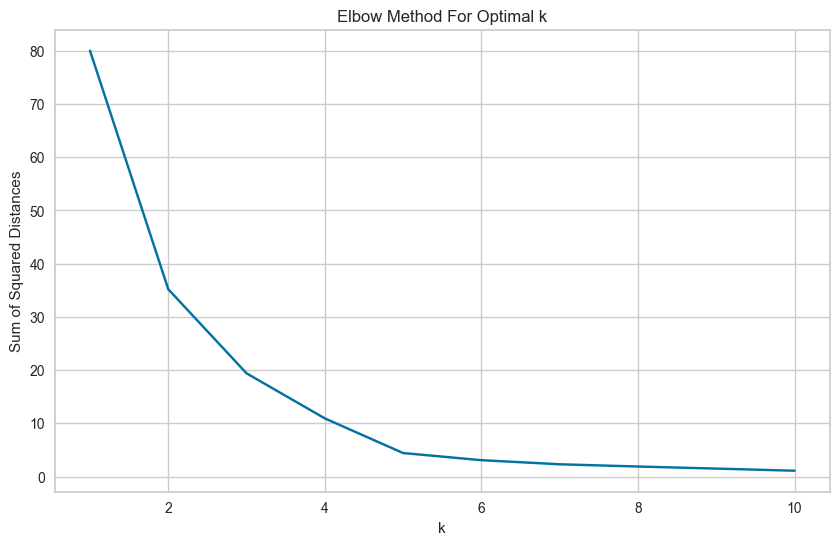

In [132]:
# Determine the optimal number of clusters using the Elbow method
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data)
sum_of_squared_distances = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_data)
    sum_of_squared_distances.append(km.inertia_)

# Plotting the Elbow method graph
plt.figure(figsize=(10,6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

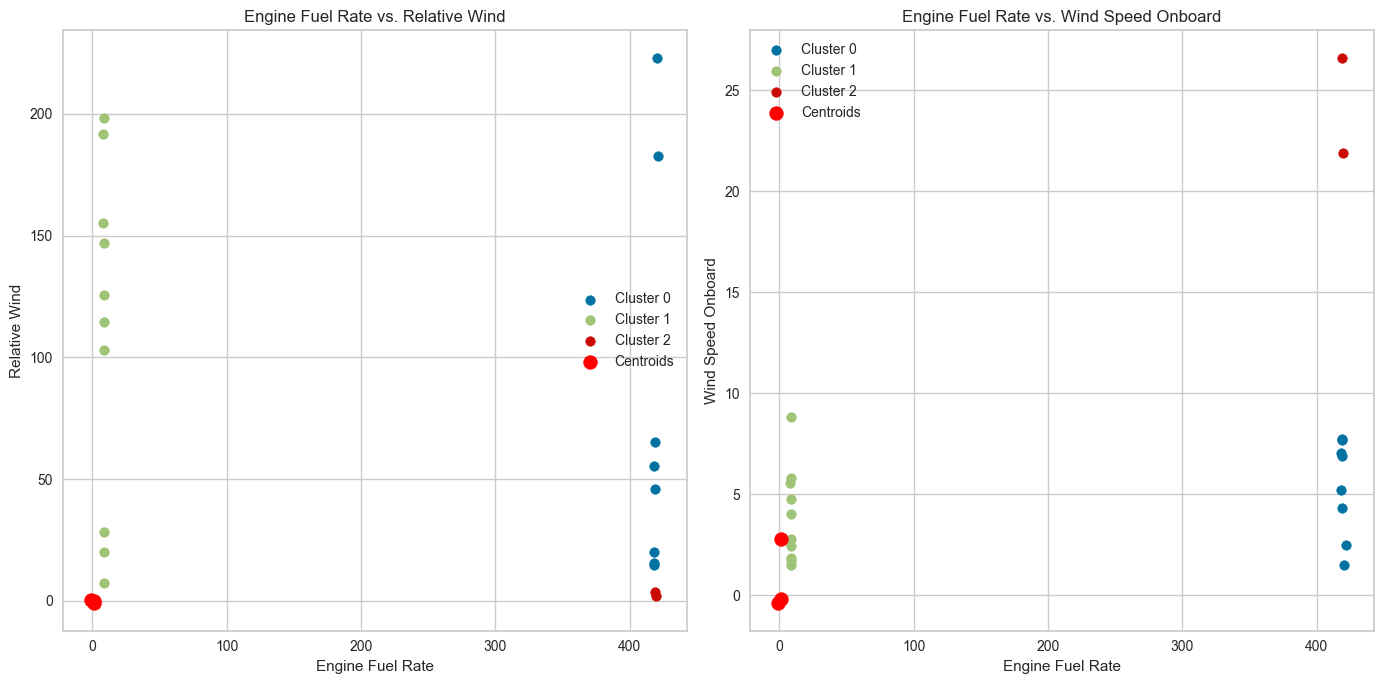

In [133]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled_data)

# Adding cluster labels to the combined_data
combined_data['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(14, 7))

# Engine fuel rate vs. relativeWind
plt.subplot(1, 2, 1)
for i in range(3):
    subset = combined_data[combined_data['Cluster'] == i]
    plt.scatter(subset['engine_fuel_rate'], subset['relativeWind'], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.xlabel('Engine Fuel Rate')
plt.ylabel('Relative Wind')
plt.title('Engine Fuel Rate vs. Relative Wind')
plt.legend()

# Engine fuel rate vs. windSpeed_Onb
plt.subplot(1, 2, 2)
for i in range(3):
    subset = combined_data[combined_data['Cluster'] == i]
    plt.scatter(subset['engine_fuel_rate'], subset['windSpeed_Onb'], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=100, c='red', label='Centroids')
plt.xlabel('Engine Fuel Rate')
plt.ylabel('Wind Speed Onboard')
plt.title('Engine Fuel Rate vs. Wind Speed Onboard')
plt.legend()

plt.tight_layout()
plt.show()

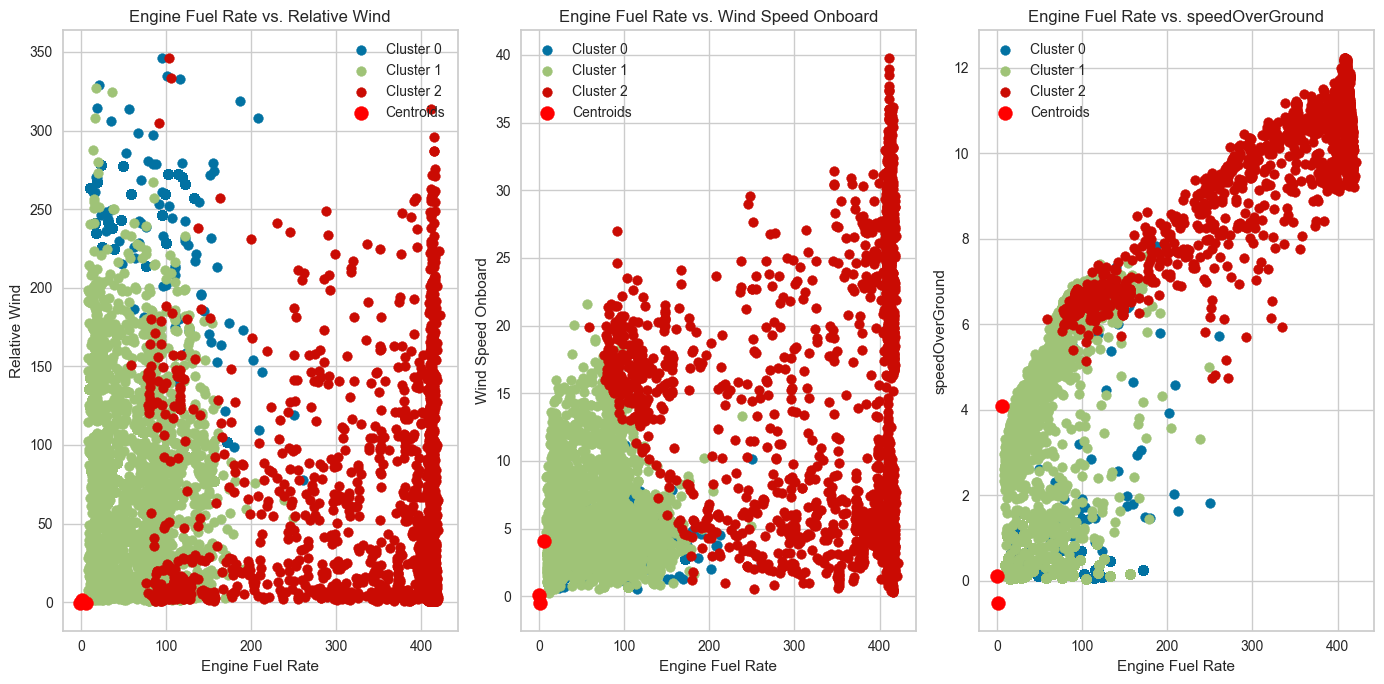

In [134]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(minute_data)
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled_data)

# Adding cluster labels to the combined_data
minute_data['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(14, 7))

# Engine fuel rate vs. relativeWind
plt.subplot(1, 3, 1)
for i in range(3):
    subset = minute_data[minute_data['Cluster'] == i]
    plt.scatter(subset['engine_fuel_rate'], subset['relativeWind'], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')
plt.xlabel('Engine Fuel Rate')
plt.ylabel('Relative Wind')
plt.title('Engine Fuel Rate vs. Relative Wind')
plt.legend()

# Engine fuel rate vs. windSpeed_Onb
plt.subplot(1, 3, 2)
for i in range(3):
    subset = minute_data[minute_data['Cluster'] == i]
    plt.scatter(subset['engine_fuel_rate'], subset['windSpeed_Onb'], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=100, c='red', label='Centroids')
plt.xlabel('Engine Fuel Rate')
plt.ylabel('Wind Speed Onboard')
plt.title('Engine Fuel Rate vs. Wind Speed Onboard')
plt.legend()

# Engine fuel rate vs. windSpeed_Onb
plt.subplot(1, 3, 3)
for i in range(3):
    subset = minute_data[minute_data['Cluster'] == i]
    plt.scatter(subset['engine_fuel_rate'], subset['speedOverGround'], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=100, c='red', label='Centroids')
plt.xlabel('Engine Fuel Rate')
plt.ylabel('speedOverGround')
plt.title('Engine Fuel Rate vs. speedOverGround')
plt.legend()

plt.tight_layout()
plt.show()

In [135]:
print((minute_data['Cluster'] == 0).sum())
print((minute_data['Cluster'] == 1).sum())
print((minute_data['Cluster'] == 2).sum())

46107
136508
2094


In [136]:
minute_data['leg'] = data['leg']
minute_data['leg']= minute_data['leg'].fillna(method='ffill')
minute_data['leg'].isnull().sum()
minute_data['leg'].describe()


count            184708
unique                2
top       sodra-vaxholm
freq             109288
Name: leg, dtype: object

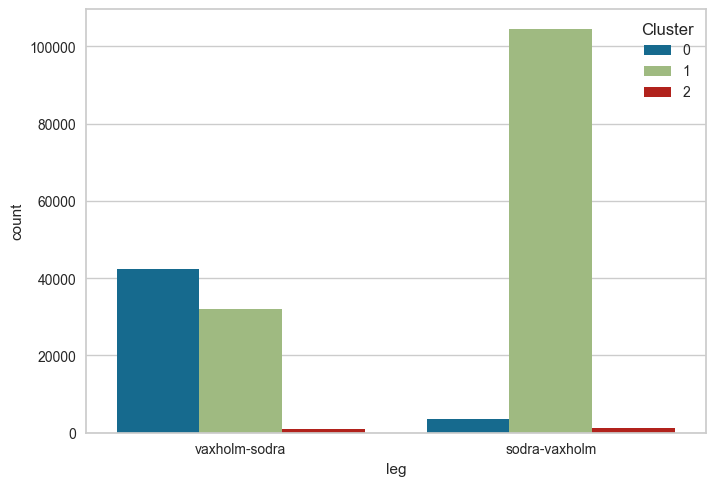

In [138]:

# importing the required library
 
import seaborn as sns
import matplotlib.pyplot as plt


# count plot on two categorical variable
sns.countplot(x = minute_data['leg'], hue = minute_data['Cluster'], data = minute_data, palette = sns.color_palette())
sns.color_palette("husl", 9)
# Show the plot
plt.show()

In [139]:
print((minute_data['Cluster'] == 0).sum())
print((minute_data['Cluster'] == 1).sum())
print((minute_data['Cluster'] == 2).sum())

46107
136508
2094


In [142]:
minute_data['segment_state'] = data['segment_state']
minute_data['segment_state']= minute_data['segment_state'].fillna(method='ffill')
minute_data['segment_state'].isnull().sum()
minute_data['segment_state'].describe()

count      184708
unique          3
top       docking
freq       180950
Name: segment_state, dtype: object

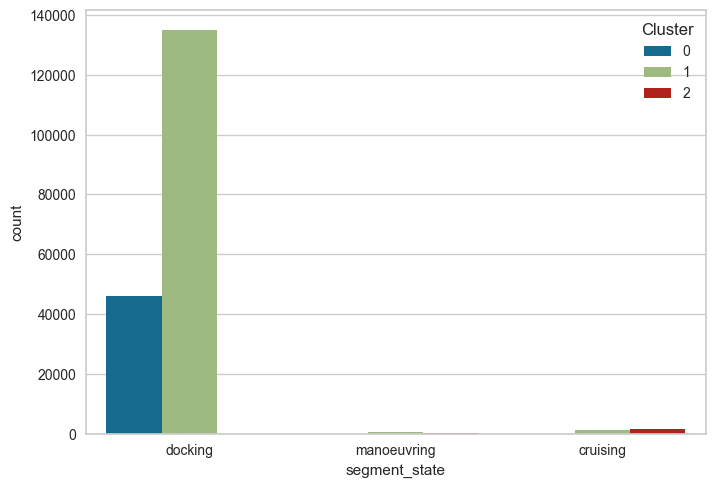

In [144]:
# importing the required library
 
import seaborn as sns
import matplotlib.pyplot as plt


# count plot on two categorical variable
sns.countplot(x = minute_data['segment_state'], hue = minute_data['Cluster'], data = minute_data, palette = sns.color_palette())
sns.color_palette("husl", 9)
# Show the plot
plt.show()

In [149]:
minute_data['closest_dock'] = data['closest_dock']
minute_data['closest_dock']= minute_data['closest_dock'].fillna(method='ffill')
minute_data['closest_dock'].isnull().sum()
minute_data['closest_dock'].describe()



count      184708
unique          3
top       vaxholm
freq       107308
Name: closest_dock, dtype: object

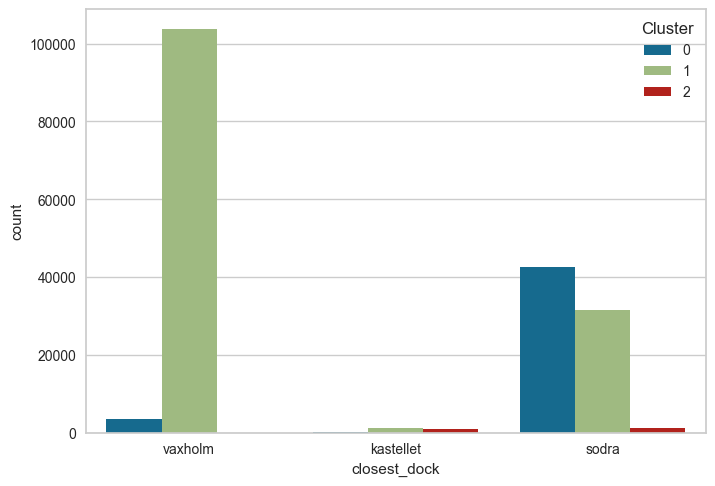

In [150]:
# importing the required library
 
import seaborn as sns
import matplotlib.pyplot as plt


# count plot on two categorical variable
sns.countplot(x = minute_data['closest_dock'], hue = minute_data['Cluster'], data = minute_data, palette = sns.color_palette())
sns.color_palette("husl", 9)
# Show the plot
plt.show()

## Conclusion:
The vessel's operational patterns and conditions, as represented by engine fuel rate, relative wind, and other variables, can be grouped into distinct clusters. These clusters provide insights into different scenarios or conditions the vessel operates under. The distribution of these clusters across different legs, segment states, and proximity to docks further refines our understanding. For instance, certain operational patterns might be more common during docking or when near specific docks. By understanding these patterns, better operational decisions can be made to optimize fuel consumption and overall vessel performance.